## Exploring Seaborn

In [41]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
#By writing this line you don't have to mention plt.show everytime
%matplotlib inline 



In [42]:
data_BM = pd.read_csv(r"C:\Users\Dell\Downloads\Data Science Files\Seaborn Explanation\bigmart_data.csv")
data_BM = data_BM.dropna(how="any")  # removes nan values even if atleast one of them is present, the row is removed

# multiply Item_Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


## Basic Plots

## Line Plot
When analyzing certain datasets, you might need to examine how one variable changes over time, or with another continuous variable.<br>
In seaborn, you can achieve this using the lineplot() function, either directly or through relplot() by setting kind="line".



<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

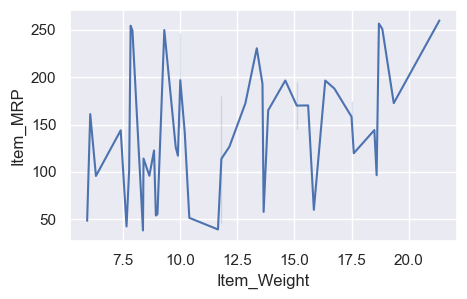

In [52]:
plt.figure(figsize=(5,3))

sns.lineplot(x="Item_Weight", y="Item_MRP",data=data_BM[:50])

## Bar Chart

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

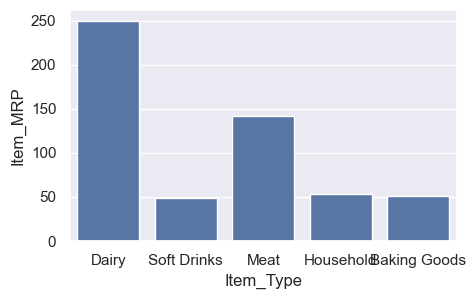

In [53]:
plt.figure(figsize=(5,3))

sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])

## Histogram
We can create a histogram in seaborn by simply using the distplot().

<Axes: xlabel='Item_MRP', ylabel='Count'>

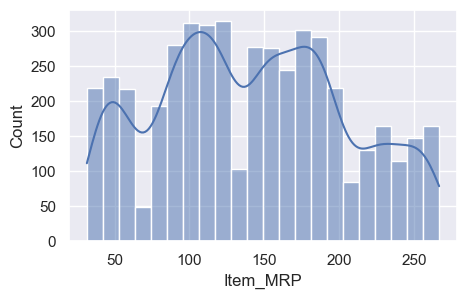

In [54]:
plt.figure(figsize=(5,3))

sns.histplot(data_BM['Item_MRP'], kde=True) #kde =True for line curve

## Box plots
We can use the boxplot() for creating boxplots in seaborn.<br>
Box plots good for depicting Continous data

Text(0.5, 1.0, 'Box Plot of Item Outlet Sales')

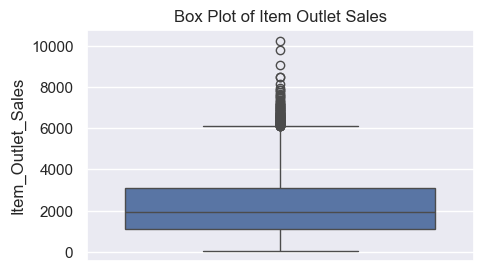

In [68]:
plt.figure(figsize=(5,3))

sns.boxplot(data_BM['Item_Outlet_Sales']) #by default, Seaborn interprets this as the y parameter, since x or y isn' mentioned
plt.title('Box Plot of Item Outlet Sales')

# sns.boxplot(x=data_BM['Item_Outlet_Sales'])

Text(0.5, 1.0, 'Box Plot of Item MRP')

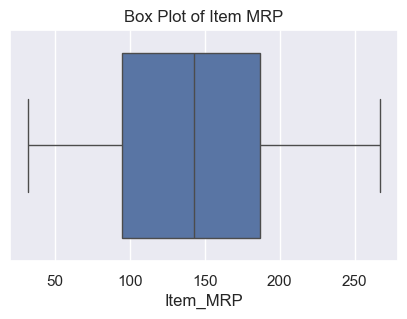

In [71]:
plt.figure(figsize=(5,3))

sns.boxplot(x=data_BM['Item_MRP'])
plt.title('Box Plot of Item MRP')

## Violin plot

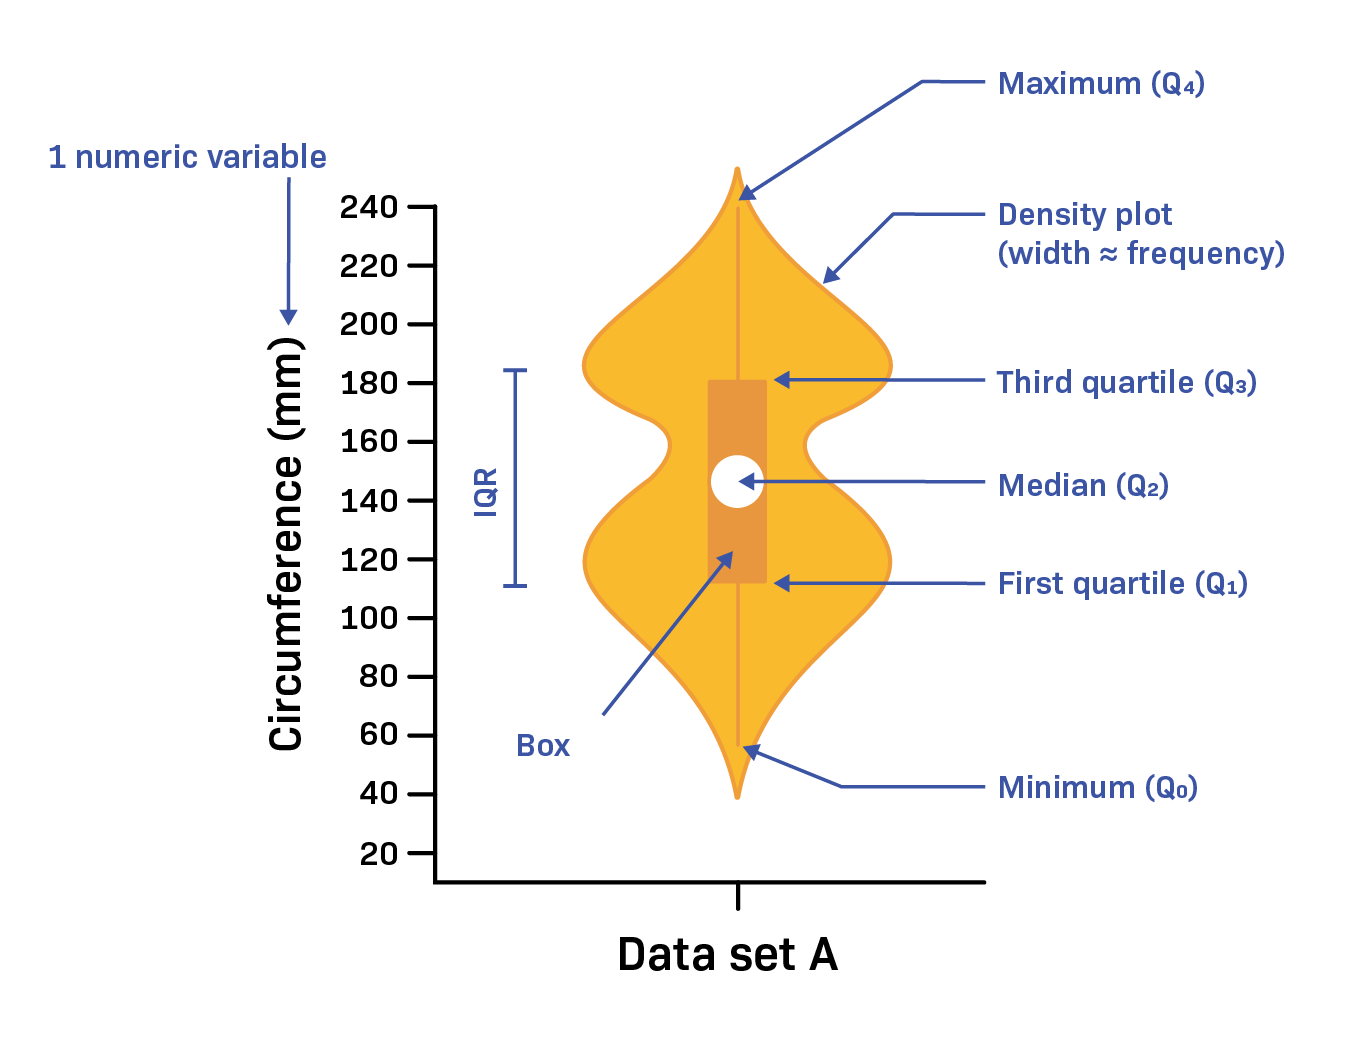


<Axes: ylabel='Item_Outlet_Sales'>

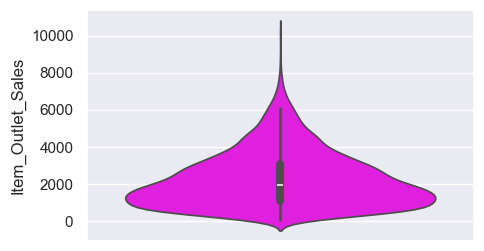

In [76]:
plt.figure(figsize=(5,3))

sns.violinplot(data_BM['Item_Outlet_Sales'], orient='vertical', color='magenta')

## Scatter plot
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables.<br>
sns.scatterplot() is used for direct and simple scatter plots, while sns.relplot(kind="scatter") offers more flexibility, allowing for facet grids and consistent syntax across plot types. 

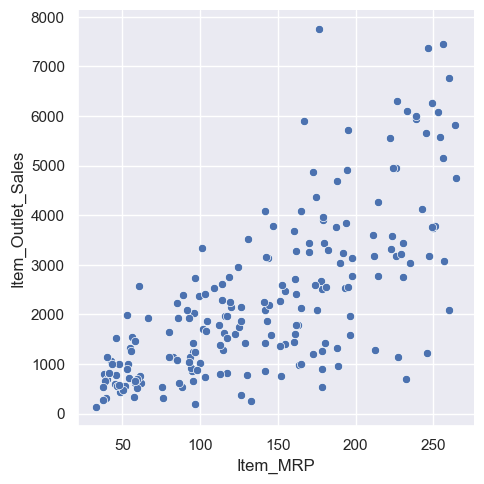

In [77]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter");

## Hue semantic paramter
When you use the hue parameter in Seaborn functions like sns.relplot() or sns.scatterplot(), you pass the name of a column from your DataFrame. Seaborn then automatically assigns different colors to the data points based on the unique values in that column.

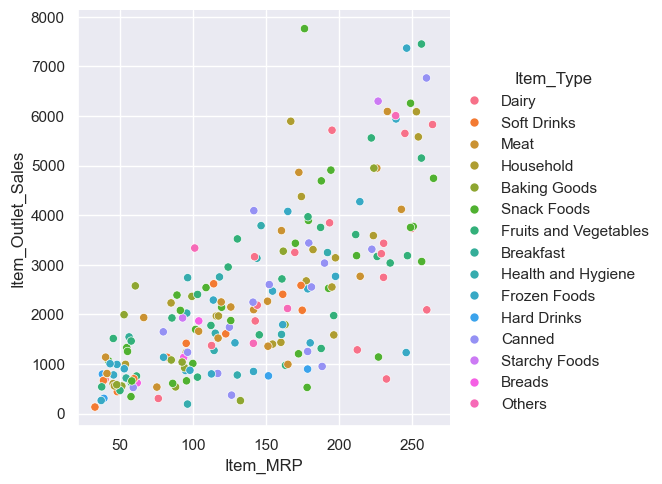

In [78]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=data_BM[:200]);

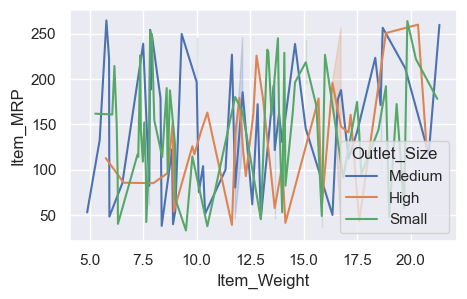

In [80]:
# Using hue for the earlier line chart we created
plt.figure(figsize=(5,3))

sns.lineplot(x="Item_Weight", y="Item_MRP",hue='Outlet_Size',data=data_BM[:150]);

## Bubble plot¶
A bubble plot is a type of scatter plot where the data points are represented by bubbles instead of simple dots.<br>
The size of each bubble represents an additional dimension of the data, typically a third numerical variable. <br>
This way, a bubble plot can visualize three dimensions of data at once.

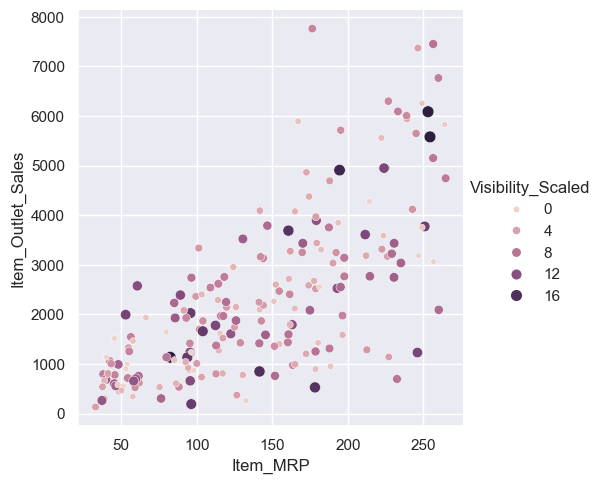

In [82]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter", size="Visibility_Scaled", hue="Visibility_Scaled");

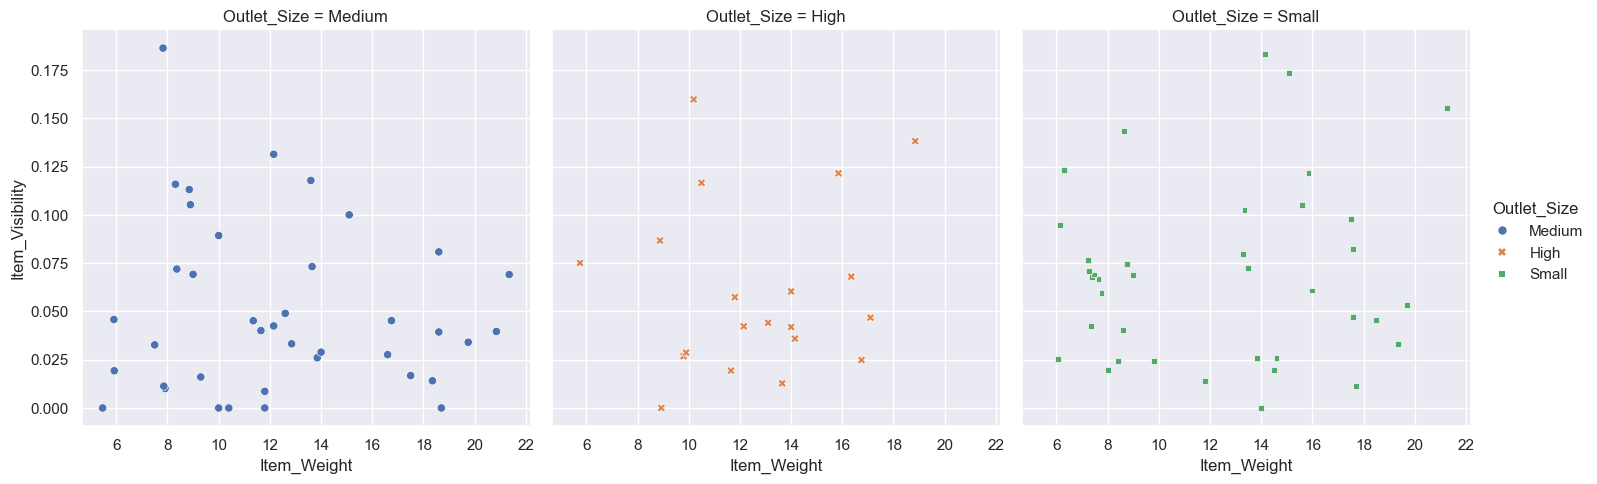

In [84]:
# Category wise sub plot¶
# subplots for each of the category of Outlet_Size

sns.relplot(x="Item_Weight", y="Item_Visibility",hue='Outlet_Size',style='Outlet_Size',col='Outlet_Size',data=data_BM[:100]);

**Default representation of the data in catplot() uses a scatterplot.**

## a Categorical scatterplots

## aC1 Strip plot
A strip plot is a type of categorical plot used to display the distribution of data points along an axis. <br>
It's particularly useful for visualizing the distribution of a single variable across different categories.<br> The points in a strip plot are typically jittered to avoid overlap, making it easier to see the distribution.

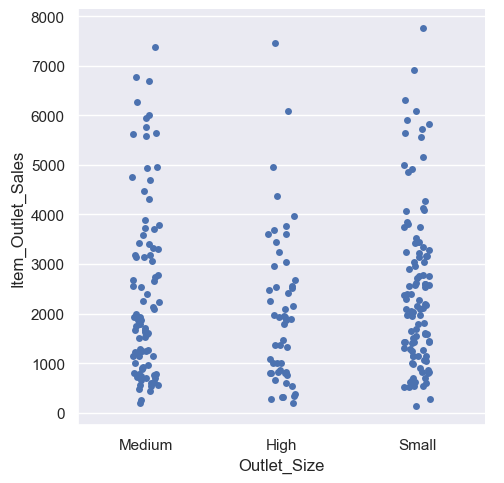

In [87]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=data_BM[:250]);

## aC2 Swarm plot
Swarmplot which is another type of categorical plot in Seaborn.<br> A swarm plot is similar to a strip plot but with the points adjusted (swarmed) to avoid overlap, making it easier to see the distribution of data points within categories.

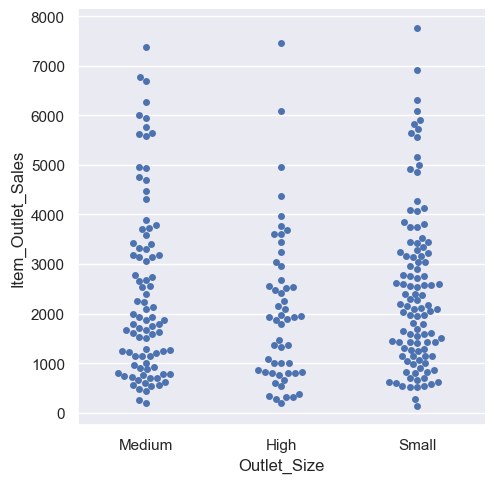

In [86]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=data_BM[:250]);

## b. Categorical distribution plots
## bC1 Box Plots

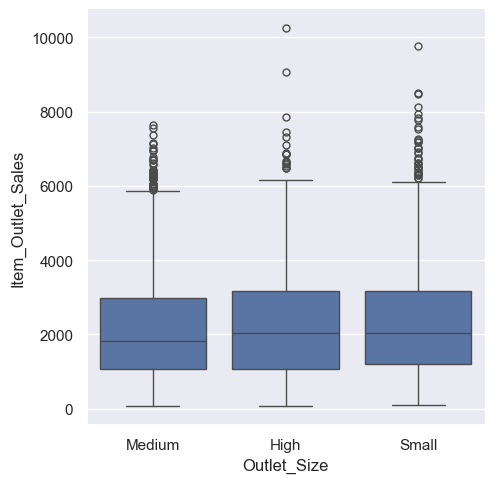

In [89]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=data_BM);

## bC2 Violin Plots

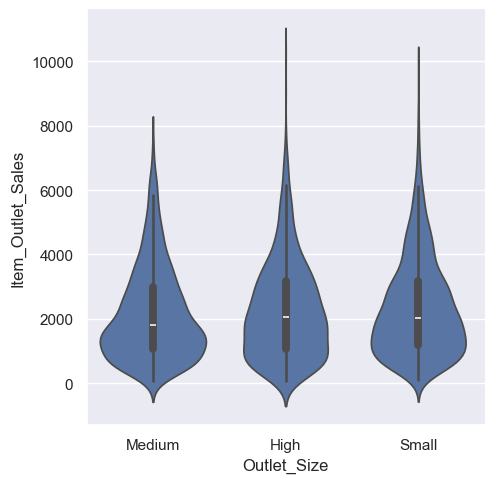

In [90]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=data_BM);

## bC3 Boxen plots

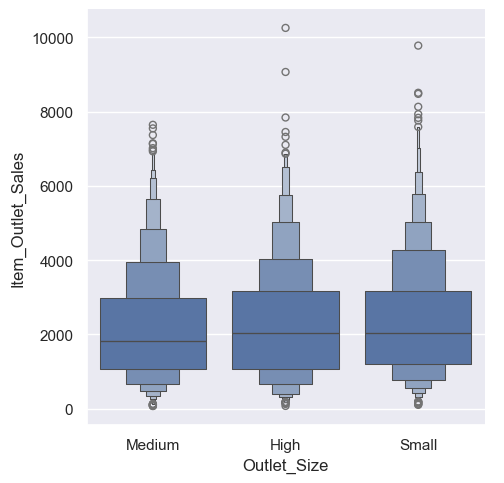

In [91]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=data_BM)

## bC4 Point plot

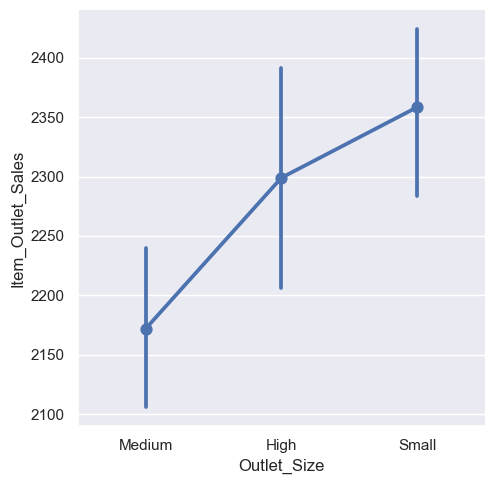

In [93]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=data_BM);

## Bar plots

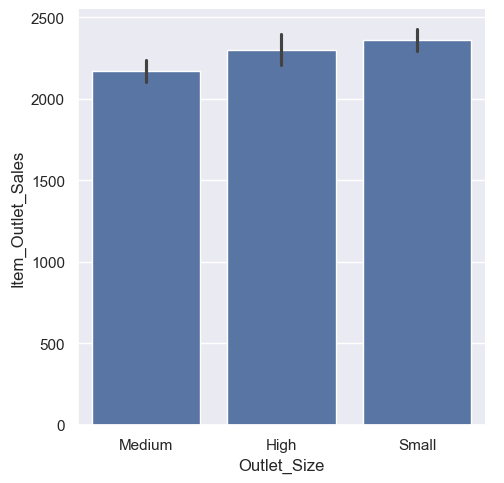

In [94]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=data_BM);

## 3. Density Plots
A density plot (also known as a Kernel Density Estimate or KDE plot) is a smooth estimate of the distribution of data. <br>It's a great way to visualize the shape of your data distribution and can be used to compare multiple distributions.

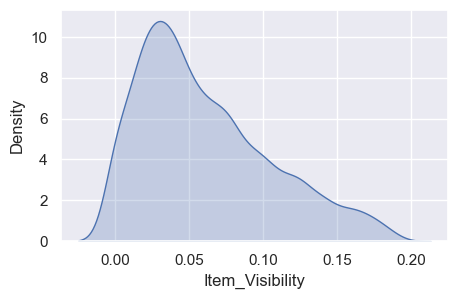

In [97]:
plt.figure(figsize=(5,3))
sns.kdeplot(data_BM['Item_Visibility'], shade=True);

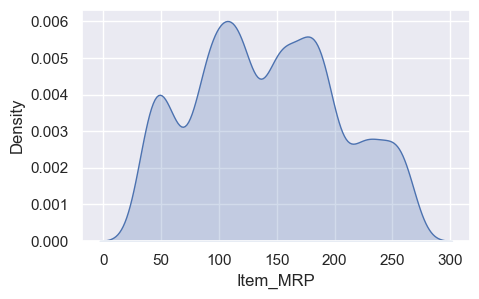

In [99]:
# distribution of Item MRP
plt.figure(figsize=(5,3))
sns.kdeplot(data_BM['Item_MRP'], shade=True);

## 4. Pair plots
Seaborn Pairplot is a Python data visualization library that allows you to plot pairwise relationships between variables within a data set. 

In [100]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


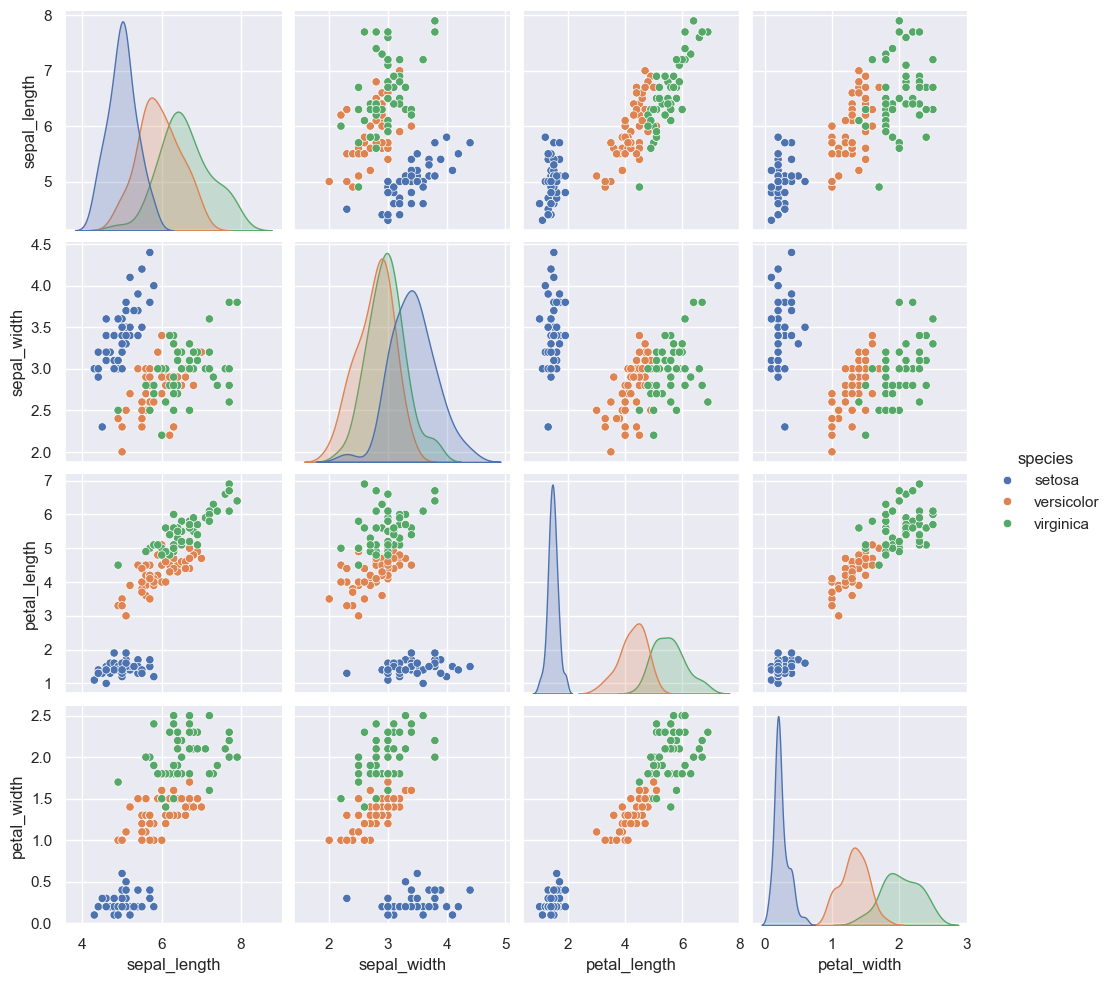

In [101]:
sns.pairplot(iris, hue='species', height=2.5);